In [1]:
%pylab inline
import numpy as np
import scipy.linalg as la
from scipy.special import factorial
import os,sys,inspect
import h5py
from IPython import display

data_path = 'C:/Users\Eesh Gupta\Documents\RU Research\Chakram\quantum-optimal-control\pulses\output_pulses'

from quantum_optimal_control.helper_functions.grape_functions import *
from quantum_optimal_control.main_grape.grape import Grape

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Defining time scales
total_time = 5.0
steps = 500

# Choose optimizing State transfer or Unitary gate
state_transfer = False

#Defining H0
qubit_state_num = 4
alpha = 0.224574
freq_ge = 3.9225#GHz
ens = np.array([ 2*np.pi*ii*(freq_ge - 0.5*(ii-1)*alpha) for ii in np.arange(qubit_state_num)])
Q_x   = np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)+np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1)
Q_z   = np.diag(np.arange(0,qubit_state_num))
I_q = np.identity(qubit_state_num)
H_q = np.diag(ens)
H0 = H_q 
       

#Defining Concerned states (starting states)
if state_transfer:
    psi0=[0]
else:
    psi0 = [0,1]

#Defining states to include in the drawing of occupation
states_draw_list = [0,1,2]
states_draw_names = ['g','e','f']

#Defining U (Target)

Ut_c = la.expm((0-1j)*total_time*H0)
Ct_c = Ut_c.copy()
Ct_c[1,0] = 1
Ct_c[0,1] = 1
Ct_c[0,0] = 0
Ct_c[1,1] = 0
U = Ct_c

#Defining U0 (Initial)
q_identity = np.identity(qubit_state_num)
U0= q_identity

#Defining control Hs
XI = Q_x
ZI = Q_z
Hops = [XI,ZI]
ops_max_amp = [2.0,2.0]
Hnames =['x','z']

#Defining convergence parameters
max_iterations = 100
decay = max_iterations/2
convergence = {'rate':0.1, 'update_step':10, 'max_iterations':max_iterations,\
               'conv_target':1e-4,'learning_rate_decay':decay}

u0 = None

#Definining reg coeffs

reg_coeffs = {'amplitude':0.1,'dwdt':0.001,'forbidden_coeff_list':[10,100],'states_forbidden_list':[2,3]}
# reg_coeffs = {'bandpass':0.1,'band':[3,5],'forbidden':100,'states_forbidden_list':[2,3]}

In [4]:
ens

array([ 0.        , 24.64579437, 47.88054868, 69.70426293])

C:\Users\Eesh Gupta\Documents\RU Research\Chakram\quantum-optimal-control\quantum_optimal_control\helper_functions\data_management.py:13: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  h5py.File.__init__(self, *args, **kwargs)


data saved at: C:/Users\Eesh Gupta\Documents\RU Research\Chakram\quantum-optimal-control\pulses\output_pulses\00000_transmon_pi.h5


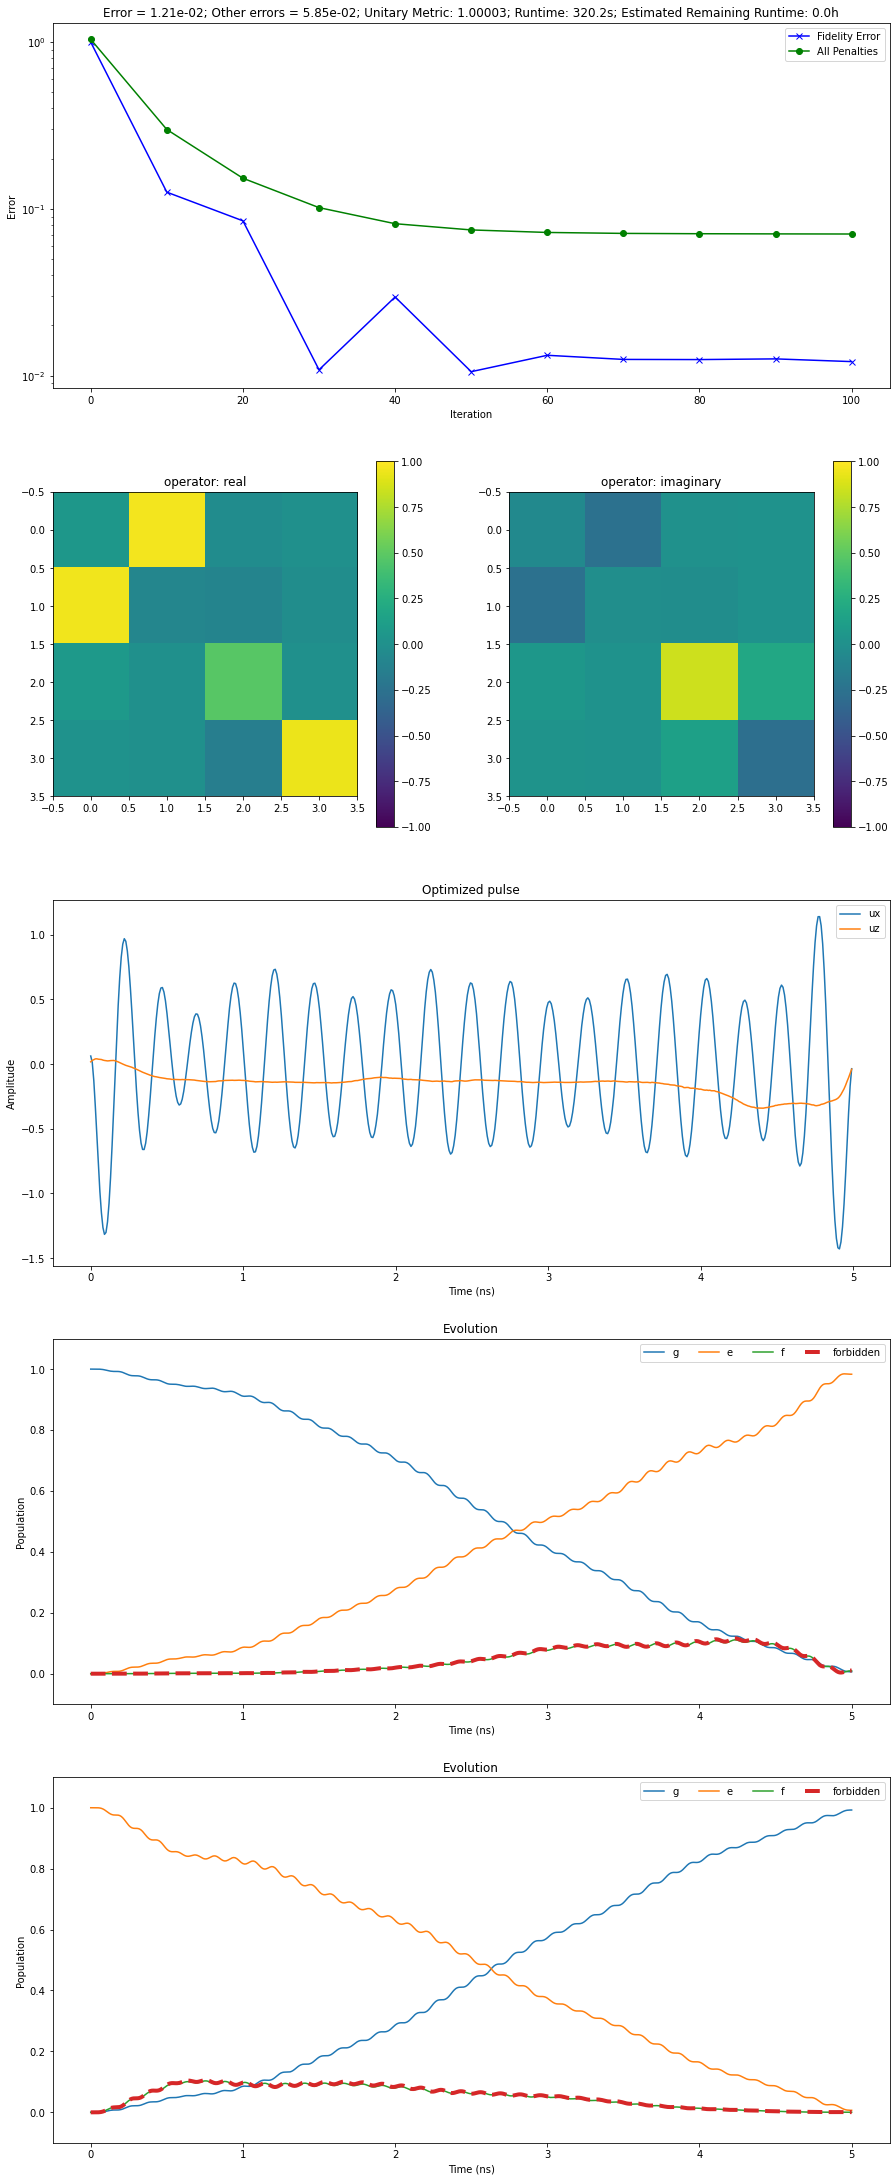

In [3]:
uks,U_final = Grape(H0,Hops,Hnames,U,total_time,steps,psi0,convergence=convergence, draw = [states_draw_list,states_draw_names],show_plots = True, 
 unitary_error = 1e-8, method = 'Adam',maxA=ops_max_amp,initial_guess=u0,\
                    use_gpu=False,reg_coeffs=reg_coeffs, file_name='transmon_pi', 
                    data_path = data_path)
      